In [1]:
from PIL import Image, ImageDraw, ImageFilter

The originial image size is: w = 1695, h = 1750
It is resized to: w = 200, h = 200


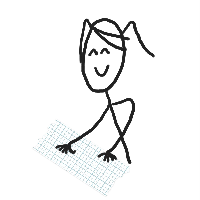

In [60]:
filename = 'typing'
im_rgb = Image.open(filename+".jpg")

width, height = im_rgb.size    
newsize = (200, 200) 
im_resize = im_rgb.resize(newsize) 
print(f"The originial image size is: w = {width}, h = {height}")
print(f"It is resized to: w = {newsize[0]}, h = {newsize[1]}")
im_resize.save(filename + '_resize.png')
im_resize

In [45]:
# put alpha channel to the original image. In this example, the whole image is 50% transparent
im_resize_a = im_resize.copy()
im_resize_a.putalpha(128) # 50% transprency
im_resize_a.save(filename + '_alpha.png')

In [56]:
# Draw a white circle on a black background and set it to the alpha channel.
im_a = Image.new("L", im_resize.size, 0)
draw = ImageDraw.Draw(im_a)

start_x = 50
start_y = 10
w = 100
h = 100
draw.ellipse((start_x, start_y, start_x+w, start_y+h), fill=255) 


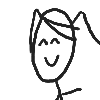

In [57]:
# Crop with solid boudary
im_resize.putalpha(im_a)
im_resize_crop = im_resize.crop((start_x, start_y, start_x+w, start_y+h))
im_resize_crop.save(filename + '_cirlce.png')
im_resize_crop

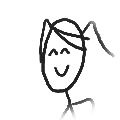

In [58]:
#Crop with blurred boudary
margin = 10 # choose the margin larger tha gaussian number, doulbe seem good
im_a_blur = im_a.filter(ImageFilter.GaussianBlur(5))
im_g = im_resize.copy()
im_g.putalpha(im_a_blur)
im_g_crop = im_g.crop((start_x-margin, start_y-margin, start_x+w+margin, start_y+h+margin))
im_g_crop.save(filename + '_blur.png')
im_g_crop